10 Scipy

Exercise 10.1: Least squares

Exercise 10.1: Least squares

Generate matrix A ∈ Rm×n with m > n. Also generate some vector b ∈ Rm.
Now find x = arg minx kAx − bk2.
Print the norm of the residual.

In [24]:
import scipy.optimize as opt

m = 5
n = 3
A = np.random.rand(m, n)
b = np.random.rand(m)
res = opt.lsq_linear(A, b)
x = res.x

residual = b - np.dot(A, x)
norm = np.linalg.norm(residual)

print(norm)

0.14921383032279145


Exercise 10.2: Optimization

Find the maximum of the function
f(x) = sin2
(x − 2)e
−x
2

In [30]:
import matplotlib.pyplot as plt

def func(x) :
    return -1 * ((np.sin(x-2))**2)*(np.e**(-(x**2)))

res = opt.minimize_scalar(func)
x = res.x

print(-1*func(x))

0.9116854118471548


Exercise 10.3: Pairwise distances

Let X be a matrix with n rows and m columns. How can you compute the pairwise distances between
every two rows?
As an example application, consider n cities, and we are given their coordinates in two columns. Now
we want a nice table that tells us for each two cities, how far they are apart.
Again, make sure you make use of Scipy’s functionality instead of writing your own routine.

In [35]:
import scipy.spatial.distance as dis

n, m = 50, 100
X = np.random.rand(n, m)

de = dis.pdist(X)
x = []
y = []
for a in range(0, n//2):
    x = x + [a for _ in range(1, n)]
    y = y + [b for b in range(1, n)]

x = np.array(x) 
y = np.array(y) 
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

11 Matplotlib

Exercise 11.1: Plotting a function

Plot the function
f(x) = sin2
(x − 2)e
−x
2
over the interval [0, 2]. Add proper axis labels, a title, etc.


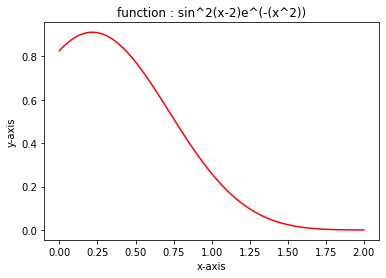

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def func(x) :
    return ((np.sin(x-2))**2)*(np.e**(-(x**2)))

x_axis = np.arange(0, 2, 0.00001, dtype = float)
plt.plot(x_axis, func(x_axis), 'r-')

plt.title("function : sin^2(x-2)e^(-(x^2))")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

Exercise 11.2: Data
    
Create a data matrix X with 20 observations of 10 variables. Generate a vector b with parameters Then
generate the response vector y = Xb+z where z is a vector with standard normally distributed variables.
Now (by only using y and X), find an estimator for b, by solving
ˆb = arg min
b
kXb − yk2
Plot the true parameters b and estimated parameters ˆb. See Figure 1 for an example plot.

(20, 1)
Optimization terminated successfully.
         Current function value: 21.847284
         Iterations: 170
         Function evaluations: 296


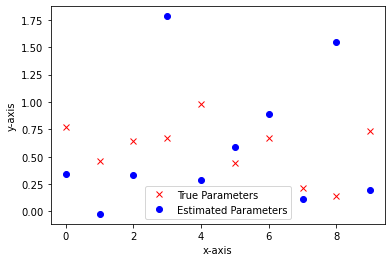

In [13]:
from scipy.optimize import fmin

X = np.random.rand(20,10)
b = np.random.rand(10,1)
z = np.random.randn(20,1)
y = X.dot(b) + z
print(y.shape)

def func(x):
    return np.linalg.norm(X.dot(x) - y, 2)

x0 = np.random.rand(10,1)

b_opt = fmin(lambda x: func(x), x0)

line_up, = plt.plot(range(len(b)), b, 'rx')
line_down, = plt.plot(range(len(b)), b_opt, 'bo')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend([line_up, line_down], ['True Parameters', 'Estimated Parameters'])
plt.show()

Exercise 11.3: Histogram and density estimation
    
Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). See Figure 2 for an example plot.


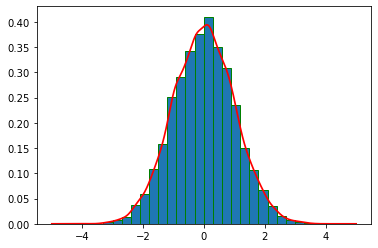

In [19]:
import seaborn as sns
import scipy.stats as sts

fig, ax = plt.subplots();

z = np.random.randn(10000)
x = np.linspace(-5, 5, 1000)

kernel_z = sts.gaussian_kde(z)
eval_z = kernel_z.pdf(x)

ax.hist(z, bins=25, density=True, edgecolor='g')
ax.plot(x, eval_z, 'r', lw=1.7)

plt.show()